In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.preprocessing import OrdinalEncoder
# from google.colab import drive
# drive.mount('/content/drive')


In [2]:
df=pd.read_csv('phase1_data.csv')
df.describe()

,DAY_OF_MONTH,FLIGHT_NUMBER,DEP_DELAY,WHEELS_OFF,WHEELS_ON,ARR_DELAY,SCHD_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,...,AIRLINE_G4,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OH,AIRLINE_OO,AIRLINE_UA,AIRLINE_WN,AIRLINE_YX,SCHD_DEP_HOUR
count,58606.000000,58606.000000,58606.000000,58606.000000,58606.000000,58606.000000,58606.000000,58606.000000,58606.000000,58606.000000,...,58606.000000,58606.000000,58606.000000,58606.000000,58606.000000,58606.000000,58606.000000,58606.000000,58606.000000,58606.000000
mean,16.714057,2734.940262,13.263983,1364.287599,1490.637836,6.514162,161.701310,154.948504,124.315241,874.200099,...,0.007934,0.001024,0.007388,0.016875,0.021363,0.025509,0.026567,0.070744,0.193154,13.031789
std,8.672211,1927.422831,56.940832,498.426095,530.060429,60.364493,79.273917,78.506718,77.239195,643.334627,...,0.088722,0.031981,0.085638,0.128806,0.144592,0.157667,0.160816,0.256398,0.394776,4.750791
min,1.000000,1.000000,-40.000000,1.000000,1.000000,-73.000000,58.000000,38.000000,18.000000,101.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1009.000000,-7.000000,946.000000,1106.000000,-19.000000,102.000000,99.000000,66.000000,405.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,17.000000,2263.000000,-3.000000,1353.000000,1519.000000,-7.000000,144.000000,140.000000,108.000000,738.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
75%,24.000000,4714.000000,9.000000,1751.000000,1922.000000,12.000000,190.000000,182.000000,151.000000,1089.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
max,31.000000,9887.000000,2554.000000,2400.000000,2400.000000,2557.000000,685.000000,749.000000,695.000000,4983.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58606 entries, 0 to 58605
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DAY_OF_MONTH         58606 non-null  int64  
 1   FLIGHT_NUMBER        58606 non-null  int64  
 2   ORIGIN               58606 non-null  object 
 3   DEST                 58606 non-null  object 
 4   SCHD_DEP_TIME        58606 non-null  object 
 5   DEP_TIME             58606 non-null  object 
 6   DEP_DELAY            58606 non-null  float64
 7   WHEELS_OFF           58606 non-null  float64
 8   WHEELS_ON            58606 non-null  float64
 9   SCHD_ARR_TIME        58606 non-null  object 
 10  ARR_TIME             58606 non-null  object 
 11  ARR_DELAY            58606 non-null  float64
 12  SCHD_ELAPSED_TIME    58606 non-null  int64  
 13  ACTUAL_ELAPSED_TIME  58606 non-null  float64
 14  AIR_TIME             58606 non-null  float64
 15  DISTANCE             58606 non-null 

In [4]:
df.head()

,DAY_OF_MONTH,FLIGHT_NUMBER,ORIGIN,DEST,SCHD_DEP_TIME,DEP_TIME,DEP_DELAY,WHEELS_OFF,WHEELS_ON,SCHD_ARR_TIME,...,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OH,AIRLINE_OO,AIRLINE_UA,AIRLINE_WN,AIRLINE_YX,DATE,SCHD_DEP_HOUR
0,1,4647,LGA,RDU,2023-01-01 17:00:00,2023-01-01 16:51:00,-9.0,1712.0,1824.0,2023-01-01 19:02:00,...,0,0,0,0,0,0,0,0,2023-01-01,17
1,1,4650,GSP,LGA,2023-01-01 13:45:00,2023-01-01 13:40:00,-5.0,1357.0,1519.0,2023-01-01 15:42:00,...,0,0,0,0,0,0,0,0,2023-01-01,13
2,1,4650,LGA,GSP,2023-01-01 10:30:00,2023-01-01 10:28:00,-2.0,1051.0,1222.0,2023-01-01 12:56:00,...,0,0,0,0,0,0,0,0,2023-01-01,10
3,1,4654,JFK,DTW,2023-01-01 19:10:00,2023-01-01 19:05:00,-5.0,1926.0,2055.0,2023-01-01 21:31:00,...,0,0,0,0,0,0,0,0,2023-01-01,19
4,1,4663,JFK,MSP,2023-01-01 12:17:00,2023-01-01 12:07:00,-10.0,1230.0,1424.0,2023-01-01 14:45:00,...,0,0,0,0,0,0,0,0,2023-01-01,12


In [5]:
df['OVERALL_DELAY'] = df['CARRIER_DELAY'] + df['WEATHER_DELAY'] + df['SECURITY_DELAY'] + df['LATE_AIRCRAFT_DELAY']

In [6]:
enc = OrdinalEncoder()
enc_filter = enc.fit_transform(df[['ORIGIN', 'DEST']])
enc_df = pd.DataFrame(enc_filter, columns=enc.get_feature_names_out(['ORIGIN', 'DEST']))

In [7]:
df['SCHD_ARR_TIME'] = pd.to_datetime(df['SCHD_ARR_TIME'],errors='coerce')
df['ARR_TIME'] = pd.to_datetime(df['ARR_TIME'],errors='coerce')
df['SCHD_DEP_TIME'] = pd.to_datetime(df['SCHD_DEP_TIME'], errors='coerce')
df['DEP_TIME'] = pd.to_datetime(df['DEP_TIME'], errors='coerce')


In [9]:
df['SCHD_DEP_TIME'] = df['SCHD_DEP_TIME'].dt.hour*60 + df['SCHD_DEP_TIME'].dt.minute
df['SCHD_ARR_TIME'] = df['SCHD_ARR_TIME'].dt.hour*60 + df['SCHD_ARR_TIME'].dt.minute
df['DEP_TIME'] = df['DEP_TIME'].dt.hour*60+df['DEP_TIME'].dt.minute
df['ARR_TIME'] = df['ARR_TIME'].dt.hour*60+df['ARR_TIME'].dt.minute

In [10]:
df.drop(['DATE','FLIGHT_NUMBER','WHEELS_ON','SCHD_DEP_HOUR', 'ORIGIN', 'DEST','CARRIER_DELAY','WEATHER_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY', 'WHEELS_OFF','AIR_TIME'], axis=1, inplace=True)
df.fillna(df.median(), inplace=True)

In [11]:

X = pd.concat([df.drop(['ARR_DELAY','ARR_TIME'], axis=1), enc_df], axis=1)
objcol= X.select_dtypes(include=['object']).columns
if len(objcol) > 0:
    print("object columns found:", objcol)
    X = X.drop(objcol,axis=1)
y = df['ARR_DELAY']
cols= df.filter(regex='^AIRLINE').columns
df.drop(cols,axis=1,inplace=True)
cols=df.filter(regex='^DAY_OF').columns
df.drop(cols,axis=1,inplace=True)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#2 Linear Regression
lin_model=LinearRegression()
lin_model.fit(X_train,y_train)
lin_y_pred=lin_model.predict(X_test)
lin_mse= mean_squared_error(y_test,lin_y_pred)
lin_rmse=np.sqrt(lin_mse)
lin_mae=mean_absolute_error(y_test,lin_y_pred)
lin_r2= r2_score(y_test,lin_y_pred)
print(f"Linear Regression Metrics:  Mean Square Error: {lin_mse}, Root Mean Square Error: {lin_rmse}")
print(f"Mean Absolute Error: {lin_mae}, r2: {lin_r2}")


Linear Regression Metrics:  Mean Square Error: 0.03674791230756976, Root Mean Square Error: 0.1916974499245354
Mean Absolute Error: 0.04473223320324525, r2: 0.9999916800292629


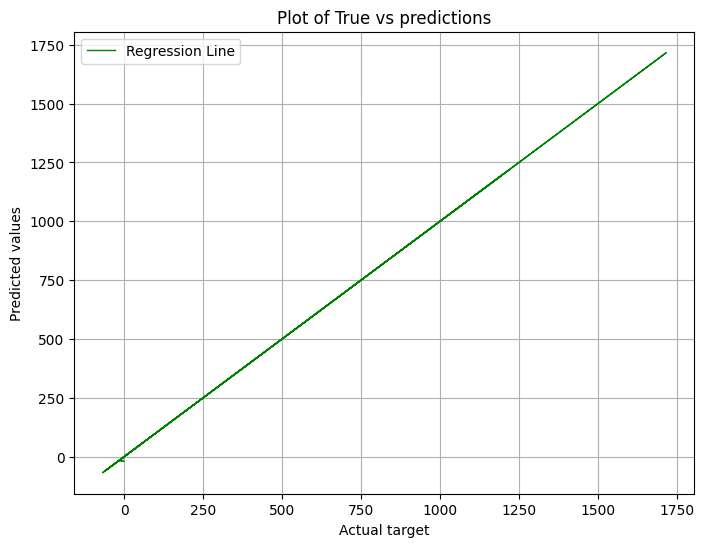

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(y_test, lin_y_pred, color='green', linewidth=1, label='Regression Line')
plt.xlabel('Actual target')
plt.ylabel('Predicted values')
plt.title('Plot of True vs predictions')
plt.grid()
plt.legend()
plt.show()

In [15]:
airport_codes = ['LGA', 'GSP', 'JFK', 'AVL', 'ALB', 'DTW', 'RDU', 'BNA', 'ROC',
                'CVG', 'MEM', 'ORF', 'ATL', 'HPN', 'BUF', 'PVD', 'ITH', 'MSP',
                'CLE', 'SYR', 'IND', 'ILM', 'PWM', 'CHS', 'MKE', 'OMA', 'SAV',
                'BTV', 'ORD', 'CLT', 'BWI', 'STL', 'BGR', 'LAX', 'DFW', 'AUS',
                'MIA', 'DCA', 'PHX', 'SFO', 'EGE', 'SNA', 'STT', 'SEA', 'PDX',
                'FLL', 'BOS', 'SJU', 'PBI', 'MCO', 'ORH', 'RSW', 'SMF', 'SRQ',
                'JAX', 'SAT', 'IAH', 'MSY', 'PSP', 'DEN', 'MCI', 'TPA', 'LAS',
                'ONT', 'BUR', 'BQN', 'SLC', 'PSE', 'RNO', 'BZN', 'HNL', 'SAN',
                'ISP', 'SWF', 'SFB', 'PBG', 'PIE', 'PGD', 'MYR', 'PHL', 'ELM',
                'EWR', 'DAL', 'MDW', 'HOU', 'TUL', 'PIT', 'GSO', 'CMH', 'SDF',
                'LIT', 'OKC', 'EYW', 'CHO', 'XNA', 'RIC', 'MSN', 'IAD', 'BDL',
                'BGM', 'IAG', 'DAY', 'ROA', 'MTJ', 'JAC', 'TYS', 'GRR', 'BHM',
                'CAE', 'DSM', 'SCE', 'LEX']

numerical_values = [54., 37., 50., 3., 0., 29., 85., 8., 89., 22., 59.,
                    71., 1., 40., 12., 83., 47., 63., 19., 107., 45., 44.,
                    84., 18., 61., 68., 93., 11., 70., 20., 14., 104., 6.,
                    52., 27., 2., 60., 25., 78., 98., 30., 102., 105., 96.,
                    75., 34., 9., 99., 74., 57., 72., 90., 101., 103., 49.,
                    92., 43., 64., 82., 26., 56., 108., 51., 69., 13., 10.,
                    100., 81., 87., 15., 38., 91., 46., 106., 97., 73., 79.,
                    76., 66., 77., 31., 32., 23., 58., 39., 109., 80., 36.,
                    21., 95., 55., 67., 33., 17., 111., 86., 62., 41., 4.,
                    5., 42., 24., 88., 65., 48., 110., 35., 7., 16., 28.,
                    94., 53.]


airport_map = dict(zip(airport_codes, numerical_values))

print(airport_map)


{'LGA': 54.0, 'GSP': 37.0, 'JFK': 50.0, 'AVL': 3.0, 'ALB': 0.0, 'DTW': 29.0, 'RDU': 85.0, 'BNA': 8.0, 'ROC': 89.0, 'CVG': 22.0, 'MEM': 59.0, 'ORF': 71.0, 'ATL': 1.0, 'HPN': 40.0, 'BUF': 12.0, 'PVD': 83.0, 'ITH': 47.0, 'MSP': 63.0, 'CLE': 19.0, 'SYR': 107.0, 'IND': 45.0, 'ILM': 44.0, 'PWM': 84.0, 'CHS': 18.0, 'MKE': 61.0, 'OMA': 68.0, 'SAV': 93.0, 'BTV': 11.0, 'ORD': 70.0, 'CLT': 20.0, 'BWI': 14.0, 'STL': 104.0, 'BGR': 6.0, 'LAX': 52.0, 'DFW': 27.0, 'AUS': 2.0, 'MIA': 60.0, 'DCA': 25.0, 'PHX': 78.0, 'SFO': 98.0, 'EGE': 30.0, 'SNA': 102.0, 'STT': 105.0, 'SEA': 96.0, 'PDX': 75.0, 'FLL': 34.0, 'BOS': 9.0, 'SJU': 99.0, 'PBI': 74.0, 'MCO': 57.0, 'ORH': 72.0, 'RSW': 90.0, 'SMF': 101.0, 'SRQ': 103.0, 'JAX': 49.0, 'SAT': 92.0, 'IAH': 43.0, 'MSY': 64.0, 'PSP': 82.0, 'DEN': 26.0, 'MCI': 56.0, 'TPA': 108.0, 'LAS': 51.0, 'ONT': 69.0, 'BUR': 13.0, 'BQN': 10.0, 'SLC': 100.0, 'PSE': 81.0, 'RNO': 87.0, 'BZN': 15.0, 'HNL': 38.0, 'SAN': 91.0, 'ISP': 46.0, 'SWF': 106.0, 'SFB': 97.0, 'PBG': 73.0, 'PIE': 79

In [14]:
airport_codes = ['RDU', 'LGA', 'GSP', 'DTW', 'MSP', 'AVL', 'ALB', 'BUF', 'BNA',
       'MKE', 'JFK', 'CLT', 'ROC', 'MEM', 'PWM', 'ORF', 'HPN', 'ATL',
       'ITH', 'CHS', 'SAV', 'CLE', 'SYR', 'ILM', 'IND', 'CVG', 'BTV',
       'MCI', 'ORD', 'BGR', 'PVD', 'STL', 'BWI', 'OMA', 'LAX', 'DFW',
       'MIA', 'DCA', 'PHX', 'EGE', 'SFO', 'AUS', 'STT', 'SNA', 'SEA',
       'SAN', 'PDX', 'PBI', 'MCO', 'BOS', 'LAS', 'TPA', 'JAX', 'RSW',
       'FLL', 'SJU', 'SMF', 'SRQ', 'MSY', 'PSP', 'IAH', 'DEN', 'BQN',
       'ONT', 'BUR', 'SLC', 'SAT', 'PSE', 'ORH', 'RNO', 'BZN', 'ISP',
       'SWF', 'PBG', 'SFB', 'PIE', 'PGD', 'HNL', 'MYR', 'PHL', 'ELM',
       'EWR', 'DAL', 'MDW', 'HOU', 'CMH', 'RIC', 'TUL', 'LIT', 'SDF',
       'OKC', 'XNA', 'EYW', 'CHO', 'PIT', 'GSO', 'MSN', 'IAD', 'BDL',
       'BGM', 'IAG', 'DAY', 'ROA', 'JAC', 'MTJ', 'SCE', 'TYS', 'DSM',
       'BHM', 'GRR', 'CAE', 'LEX']

numerical_values = [ 85.,  54.,  37.,  29.,  63.,   3.,   0.,  12.,   8.,  61.,  50.,
        20.,  89.,  59.,  84.,  71.,  40.,   1.,  47.,  18.,  93.,  19.,
       107.,  44.,  45.,  22.,  11.,  56.,  70.,   6.,  83., 104.,  14.,
        68.,  52.,  27.,  60.,  25.,  78.,  30.,  98.,   2., 105., 102.,
        96.,  91.,  75.,  74.,  57.,   9.,  51., 108.,  49.,  90.,  34.,
        99., 101., 103.,  64.,  82.,  43.,  26.,  10.,  69.,  13., 100.,
        92.,  81.,  72.,  87.,  15.,  46., 106.,  73.,  97.,  79.,  76.,
        38.,  66.,  77.,  31.,  32.,  23.,  58.,  39.,  21.,  86., 109.,
        55.,  95.,  67., 111.,  33.,  17.,  80.,  36.,  62.,  41.,   4.,
         5.,  42.,  24.,  88.,  48.,  65.,  94., 110.,  28.,   7.,  35.,
        16.,  53.]

airport_map = dict(zip(airport_codes, numerical_values))

print(airport_map)


{'RDU': 85.0, 'LGA': 54.0, 'GSP': 37.0, 'DTW': 29.0, 'MSP': 63.0, 'AVL': 3.0, 'ALB': 0.0, 'BUF': 12.0, 'BNA': 8.0, 'MKE': 61.0, 'JFK': 50.0, 'CLT': 20.0, 'ROC': 89.0, 'MEM': 59.0, 'PWM': 84.0, 'ORF': 71.0, 'HPN': 40.0, 'ATL': 1.0, 'ITH': 47.0, 'CHS': 18.0, 'SAV': 93.0, 'CLE': 19.0, 'SYR': 107.0, 'ILM': 44.0, 'IND': 45.0, 'CVG': 22.0, 'BTV': 11.0, 'MCI': 56.0, 'ORD': 70.0, 'BGR': 6.0, 'PVD': 83.0, 'STL': 104.0, 'BWI': 14.0, 'OMA': 68.0, 'LAX': 52.0, 'DFW': 27.0, 'MIA': 60.0, 'DCA': 25.0, 'PHX': 78.0, 'EGE': 30.0, 'SFO': 98.0, 'AUS': 2.0, 'STT': 105.0, 'SNA': 102.0, 'SEA': 96.0, 'SAN': 91.0, 'PDX': 75.0, 'PBI': 74.0, 'MCO': 57.0, 'BOS': 9.0, 'LAS': 51.0, 'TPA': 108.0, 'JAX': 49.0, 'RSW': 90.0, 'FLL': 34.0, 'SJU': 99.0, 'SMF': 101.0, 'SRQ': 103.0, 'MSY': 64.0, 'PSP': 82.0, 'IAH': 43.0, 'DEN': 26.0, 'BQN': 10.0, 'ONT': 69.0, 'BUR': 13.0, 'SLC': 100.0, 'SAT': 92.0, 'PSE': 81.0, 'ORH': 72.0, 'RNO': 87.0, 'BZN': 15.0, 'ISP': 46.0, 'SWF': 106.0, 'PBG': 73.0, 'SFB': 97.0, 'PIE': 79.0, 'PGD': 76

In [16]:
import pickle

# Assuming linear_model is your trained Linear Regression model
# Save the model to a file
with open('linear_regression_model_new.pkl', 'wb') as file:
    pickle.dump(lin_model, file)
